<a href="https://colab.research.google.com/github/surajgju/Machine-Learning/blob/master/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Following code is for classification of whether a given sample is musk or non-musk.  

In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

---
Read data from directory "/content/drive/My Drive/musk_csv.csv" one can give his own directory path here)......
"m_data.head()" is showing first five row of our 



In [3]:
m_data = pd.read_csv("/content/drive/My Drive/musk_csv.csv")
m_data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


---
Below lines collect training columns on which our model will train from dataset 

In [4]:
properties = list(m_data.columns.values)
properties.remove('molecule_name')
properties.remove('class')
properties.remove('conformation_name')
properties.remove('ID')
print(properties)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f1

---
**collect training data into x and y **





In [0]:
x= m_data[properties]
y= m_data['class']


---
The data collected in x and y from dataset divided in "x_train, x_test, y_train, y_test" for training & testing purpose 





In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


----
> This is our model. For Train on data which is in  "x_train, ytrain"

In [0]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(166,)),
     keras.layers.Dense(166, activation=tf.nn.relu),
     keras.layers.Dense(166, activation=tf.nn.relu),
     keras.layers.Dense(1,activation=tf.nn.sigmoid),                     
])

----
>

Compilation of model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



---
Fit data into model and collect trained model into "history".

In [10]:
history = model.fit(x_train, y_train, epochs=8, batch_size=1, validation_data=(x_test, y_test))


Train on 5278 samples, validate on 1320 samples
Epoch 1/8
5278/5278 [==============================] - 11s 2ms/sample - loss: 2.0429 - acc: 0.8698 - val_loss: 0.5051 - val_acc: 0.8220
Epoch 2/8
5278/5278 [==============================] - 10s 2ms/sample - loss: 0.3104 - acc: 0.9049 - val_loss: 0.2240 - val_acc: 0.9447
Epoch 3/8
5278/5278 [==============================] - 10s 2ms/sample - loss: 0.2021 - acc: 0.9305 - val_loss: 0.1212 - val_acc: 0.9545
Epoch 4/8
5278/5278 [==============================] - 10s 2ms/sample - loss: 0.1658 - acc: 0.9424 - val_loss: 0.0928 - val_acc: 0.9667
Epoch 5/8
5278/5278 [==============================] - 10s 2ms/sample - loss: 0.1308 - acc: 0.9530 - val_loss: 0.1837 - val_acc: 0.9394
Epoch 6/8
5278/5278 [==============================] - 10s 2ms/sample - loss: 0.1328 - acc: 0.9560 - val_loss: 0.1098 - val_acc: 0.9621
Epoch 7/8
5278/5278 [==============================] - 10s 2ms/sample - loss: 0.1154 - acc: 0.9606 - val_loss: 0.1383 - val_acc: 0.9667


---
Save the trained model into folder "./sample_data/model_musk.h5 

In [0]:
model.save('./sample_data/model_musk.h5')


---
> print collected data into "history" variable

In [12]:
print(history.history)

{'loss': [2.0428758585816253, 0.3104046647293537, 0.20207390952738824, 0.1657823509757135, 0.13077194989736884, 0.1327549323190486, 0.11538861395630128, 0.11823926864058679], 'acc': [0.86983705, 0.9048882, 0.93046606, 0.9424024, 0.9530125, 0.95604396, 0.96059114, 0.96343315], 'val_loss': [0.5051345685569663, 0.22404235610503298, 0.12121382915293437, 0.09278731338210654, 0.1837096583485194, 0.10976606597011708, 0.13833254052307917, 0.09951689085431457], 'val_acc': [0.8219697, 0.94469696, 0.95454544, 0.96666664, 0.93939394, 0.9621212, 0.96666664, 0.9643939]}


> Evaluate our model

In [13]:
test_loss, test_acc = model.evaluate(x_test,y_test)
train_loss, train_acc = model.evaluate(x_train,y_train)


5278/5278 [==============================] - 0s 29us/sample - loss: 0.0934 - acc: 0.9640



----
> Draw loss graph using matplotlib which we import as plt  

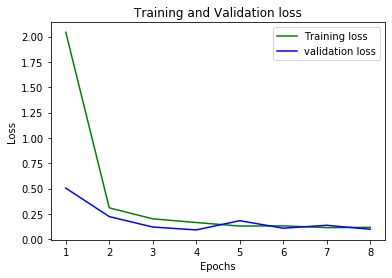

In [14]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

----
> Draw the accuracy graph.

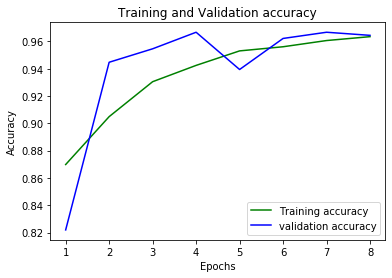

In [15]:
acc_train = history.history['acc']
acc_val = history.history['val_acc']
epochs = range(1,9)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


---
>Importing  from scikit-learn-metrics for further use 

In [0]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,confusion_matrix
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import f1_score


---
> class and probability prediction & 
> pridict crisp classes of test set



In [39]:
print('class and probability prediction')
y_predict= model.predict(x_test)
print('pridict crisp classes of test set')
yhat_classes = model.predict(x_test)
y_predict,yhat_classes

class and probability prediction
pridict crisp classes of test set


array([[0.02164438],
       [0.        ],
       [0.10897857],
       ...,
       [0.00039333],
       [0.02997118],
       [0.00012481]], dtype=float32)


---
> Accuracy using accuracy_score function from sklearn library

In [21]:
accuracy = accuracy_score(y_test,y_predict.round())
accuracy

0.9643939393939394


---
> Precision calculation using precision_score

In [36]:
precision = precision_score(y_test,yhat_classes.round())
precision

0.9782608695652174


---
> Confusion matrix calculation using confusion_matrix

In [25]:
confusion_matrix(y_test,y_predict.round())

array([[1138,    3],
       [  44,  135]])


---
> Recall using recall_score 

In [27]:
recall = recall_score(y_test, yhat_classes.round())
recall

0.7541899441340782


---
> All Precision Recall, F1-Score, Support calculation together using classification_report function

In [34]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1141
           1       0.98      0.75      0.85       179

    accuracy                           0.96      1320
   macro avg       0.97      0.88      0.92      1320
weighted avg       0.96      0.96      0.96      1320

